# Just hit play and follow along

In [2]:
# Necessary libraries
import pandas as pd
from Data.crypto_data import crypto_data_collector 
from Data.SPY_FAANGT_data import SPY_FAANGT_data
import scripts.perf_indicators as perf
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Data

In [3]:
#if user inputs 'y', API calls made to Alpha Vantage and Coin Gecko to collect and overwrite existing data, else the previous session data is loaded 
reload_response = input('Would you like to reload (y or n)?')
if reload_response == 'y':
    start_date = input('What start date would you like to begin the analysis?  YYYY-MM-DD format')
    end_date = input('What end date would you like to begin the analysis? enter custom date in YYYY-MM-DD format or "today"')
    SPY_FAANGT_df, SPY_FAANGT_close_df = SPY_FAANGT_data()
    crypto_price_df = crypto_data_collector(start_date, end_date) # only way to save a df from a function https://stackoverflow.com/questions/45579525/returning-a-dataframe-in-python-function
    print('crypto_price_data.csv saved, dataframe loaded with datetime index as `coin_historical_df`')
else:    
    crypto_price_df = pd.read_csv('Data/csv_files/crypto_price_data.csv', 
                                    parse_dates=True, 
                                    infer_datetime_format=True,
                                    index_col='time').rename(index={'time': 'date'}
                                    ) 

    SPY_FAANGT_close_df = pd.read_csv('Data/csv_files/SPY_FAANGT_close_data.csv',
                                        parse_dates=True, 
                                        infer_datetime_format=True,
                                        index_col='date'
                                     )

    crypto_price_df.to_csv('x.csv')
    print(f'''Data from previous sessions loaded''')
    


Would you like to reload (y or n)? n


Data from previous sessions loaded


## Cumulative Returns analysis

AAPL close     1.608477
SPY close      3.038746
GOOG close     4.124611
FB close       8.107387
TSLA close    24.188782
NFLX close    29.031642
AMZN close    46.756546
Name: 2021-05-18 00:00:00, dtype: float64


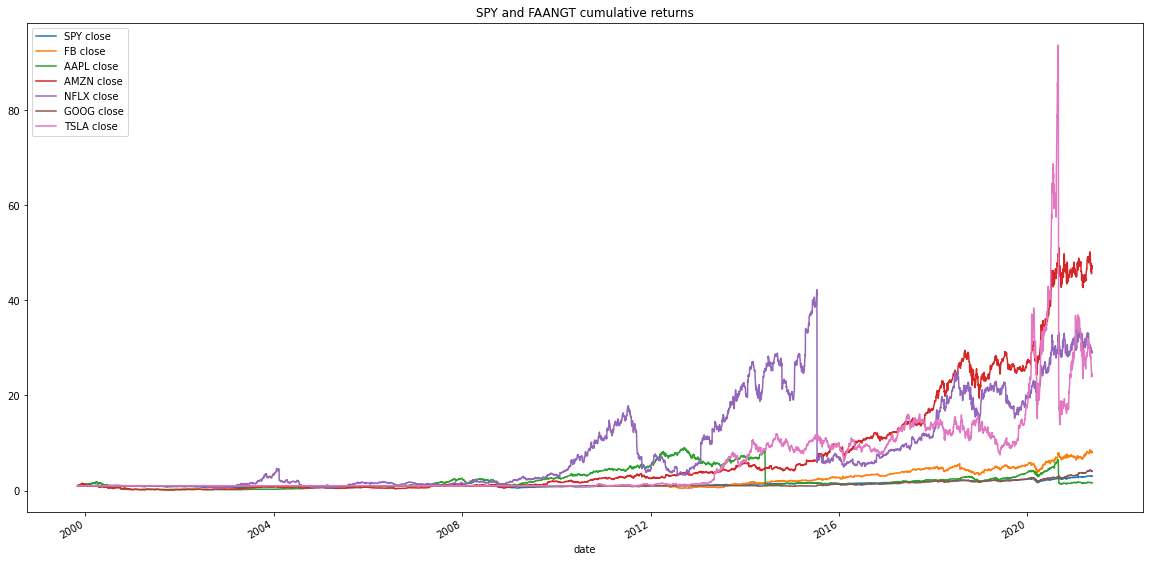

In [4]:
#Annualized PCT Change and compare 
#make data set smaller (50-100 market cap)
#change SPY_FAANGT also market cap data instead
SF_cum_returns = perf.get_cumulative_returns(SPY_FAANGT_close_df)
SF_cum_returns.plot(figsize=(20,10), title = 'SPY and FAANGT cumulative returns') #cumulative returns since 2014 (market cap data would have been better)
print(SF_cum_returns.iloc[-1].sort_values()) #gives best cumulative return todate
#need a ranker function or method and a sorting function that allows you to drop cryptos that were not around for last x days
#plot the top best performing cryptos to date average returns of top 10 performing cryptos during time period DO NOT RUN THIS CELL
# need to fix fact that cumulative returns function returns nonsense because of nan values 

data saved in Results folder


 Top 10 performers during time period
shiba-inu prices               18438.504068
paccoin prices                 11716.139934
sora prices                     7277.374449
binancecoin prices              5257.579748
ripio-credit-network prices     3172.081226
verge prices                    2358.939324
dogecoin prices                 2326.995868
groestlcoin prices               831.141298
thorchain prices                 749.375557
neo prices                       646.010854
Name: 2021-05-17 00:00:00, dtype: float64

**********************************************************

Top 10 market cap cryptos' performance during time period
binancecoin prices     5257.579748
dogecoin prices        2326.995868
ethereum prices         430.795553
ripple prices           231.406101
cardano prices           85.162167
litecoin prices          64.967495
bitcoin prices           45.707534
polkadot prices          14.470703
bitcoin-cash prices       1.534539
tether prices  

<AxesSubplot:title={'center':"Top 10 market cap cryptos' performance during time period"}, xlabel='time'>

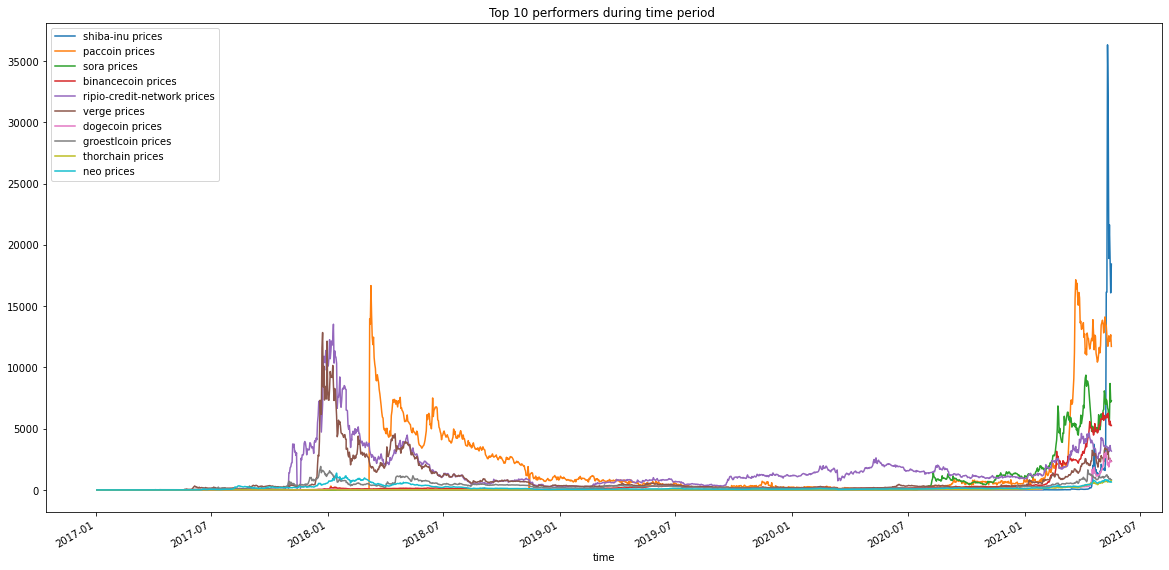

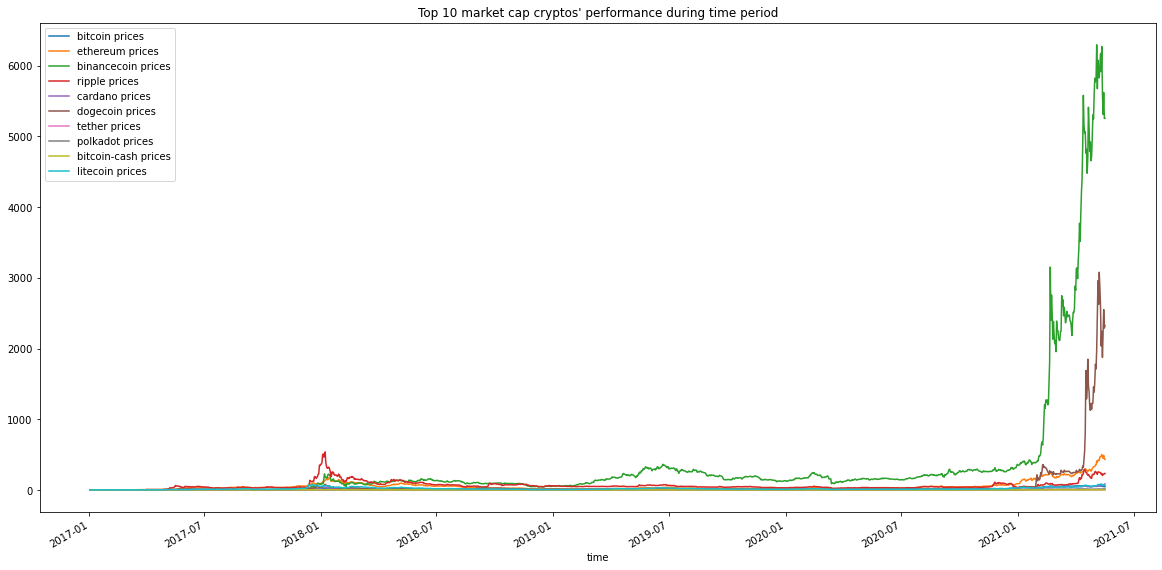

In [5]:
crypto_cum_returns = perf.get_cumulative_returns(crypto_price_df) 
top_10 = crypto_cum_returns.iloc[-1].sort_values(ascending=False).head(10) #sorting through just the latest date, decending order, and grabbing just top 10
top_10_list = top_10.index.tolist() #converting index to a list
top_10_market_cap = crypto_cum_returns.iloc[:, 0 : 10] #grab all rows, but only first 10 columns which are sorted by marketcap
top_10.to_csv('Results/top_10_returns_to_date.csv')
top_10_market_cap.to_csv('Results/top_market_cap_returns.csv')
print('''data saved in Results folder

''')

#writing for loop to plot only the top 10
for crypto in top_10_list:
    crypto_cum_returns.loc[: , crypto].plot(legend=True, figsize=(20, 10), title='Top 10 performers during time period ')
print(f''' Top 10 performers during time period
{top_10}

**********************************************************

Top 10 market cap cryptos' performance during time period
{top_10_market_cap.iloc[-1].sort_values(ascending=False)}''') #print data to see returns

top_10_market_cap.plot(legend=True, figsize=(20, 10), title="Top 10 market cap cryptos' performance during time period")


## Evaluating Risk

In [ ]:
#Calculate Volatility (Variance and Covariance of FAANGT = Facebook, Amazon, Apple, Google, Netflix, Tesla vs SP500)


### Sharpe Ratio

<AxesSubplot:title={'center':'sharpe ratios'}>

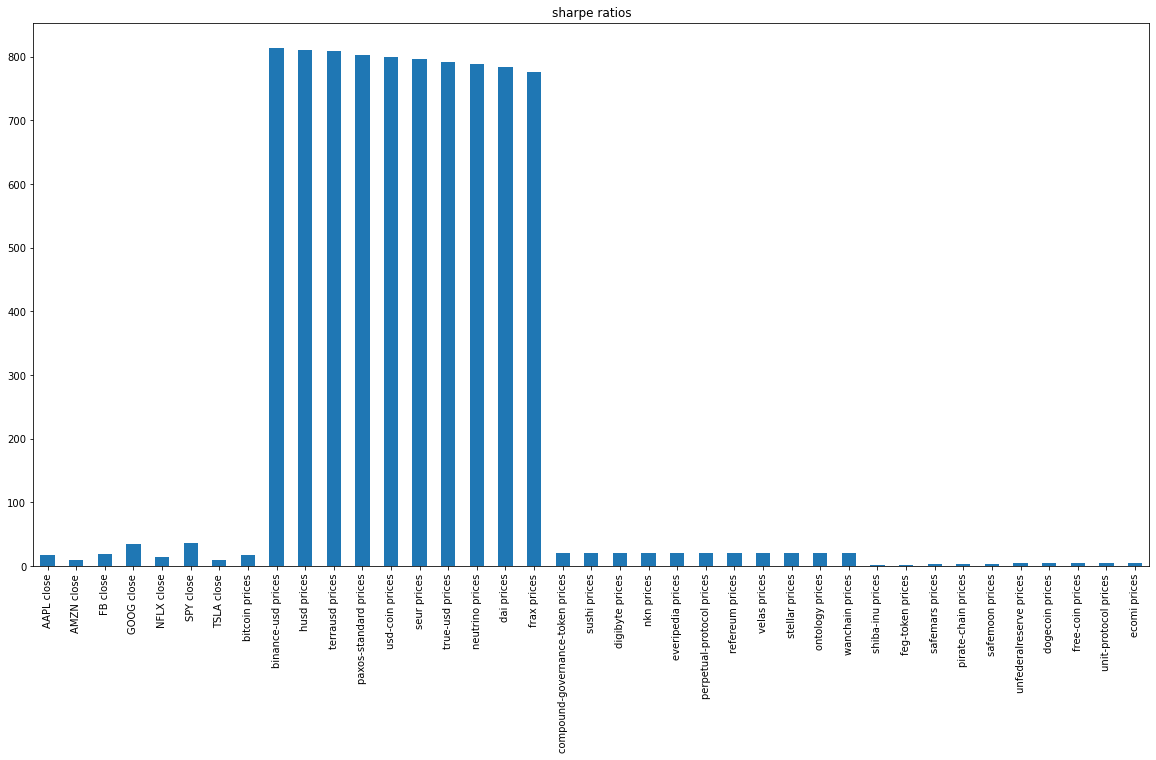

In [7]:
#Calculate Sharpe Ratio () SPY_FAANGT_close and crypto_close
# top_bottom_response = input('Do you want to see the top or bottom 10 sharpe ratios?')


crypto_sharpe = perf.get_sharpe_ratios(crypto_cum_returns, trading_days = 365)
SF_sharpe = perf.get_sharpe_ratios(SF_cum_returns)
crypto_sharpe
# top_crypto_sharpe.sort_values() #this is how we can return the top and bottom 20
#can't scatter plot a series so turn it back to data frame https://stackoverflow.com/questions/32791098/how-to-scatter-plot-series-using-pandas
top_10_sharpe = crypto_sharpe.sort_values(ascending=False).head(10) #sorting through just the latest date, decending order, and grabbing just top 10
bottom_10_sharpe = crypto_sharpe.sort_values().head(10)
middle_10_sharpe = crypto_sharpe.sort_values()[245:256]
btc_sharpe = crypto_sharpe[['bitcoin prices']]

sharpe_list = [SF_sharpe, btc_sharpe, top_10_sharpe, middle_10_sharpe, bottom_10_sharpe]
sharpe_df = pd.concat(sharpe_list, axis=0, join='outer')
sharpe_df.plot.bar(title='sharpe ratios', figsize= (20,10))


# top_10_sharpe.plot.scatter()
# top_10_list_sharpe


    
# top_10_sharpe.to_csv('Results/top_10_sharpe_to_date.csv')
# top_10_market_cap_sharpe.to_csv('Results/top_market_cap_sharpe.csv')
# print('''data saved in Results folder

# ''')

# #writing for loop to plot only the top 10

    
    
# print(f'''{top_10}

# **********************************************************

# {top_10_market_cap.iloc[-1].sort_values(ascending=False)}''') #print data to see returns
# top_10_market_cap.plot(legend=True, figsize=(20, 10))


# top_10_market_cap_sharpe = crypto_sharpe #grab all rows, but only first 10 columns which are sorted by marketcap

### Beta Analysis

In [28]:
#Calculate Beta () of SPY_FAANGT_close and crypto_close
# beta_response = input('What size of window do you want the rolling beta to be? Enter number of days (must be an integer)')
SF_rolling_beta = perf.get_rolling_beta(SF_cum_returns, SF_cum_returns['SPY close'], )
crypto_rolling_beta = perf.get_rolling_beta(crypto_cum_returns, SF_cum_returns['SPY close'])

plot_table_response = input('Would you like a plot or see table. Enter  "plot", "table", or "both"')
if plot_table_response == 'plot':
    top_bottom_response, size_response = ('Enter "top", "bottom", followed by a "," and size. example: to see top 10 results: top, 10')
    if top_bottom_response == 'top':
        SF_rolling_beta.plot(figsize=(20, 10)), crypto_rolling_beta.sort_values(ascending=False).head(size_response).plot()
    else:
        SF_rolling_beta.plot(figsize=(20, 10)), crypto_rolling_beta.sort_values()[0 : size_response].plot()
elif plot_table_response == 'table':
    print(SF_rolling_beta.iloc[-1].sort_values()), SF_rolling_beta.to_csv(f"Results/SPY_FAANGT_rolling_{beta_response}_day_beta.csv")
    print(crypto_rolling_beta.iloc[-1].sort_values()), crypto_rolling_beta.to_csv(f"Results/crypto_rolling_{beta_response}_day_beta.csv")                        
    print('Data saved in Results folder')

else:
    top_bottom_response, size_response = input('Enter "top", "bottom"'), input('followed by a "," and size. example: to see top 10 results: top, 10')
    if top_bottom_response == 'top':
        top_10 = crypto_rolling_beta.iloc[-1].sort_values(ascending=False).head(size_response) #sorting through just the latest date, decending order, and grabbing just top 10
        top_10_list = top_10.index.tolist() #converting index to a list
        top_10_market_cap = crypto_rolling_beta.iloc[:, 0 : size_response] #grab all rows, but only first 10 columns which are sorted by marketcap
        top_10.to_csv('Results/top_10_beta_to_date.csv')
        top_10_market_cap.to_csv('Results/top_market_cap_beta.csv')
        SF_rolling_beta.plot(figsize=(20, 10))
        for crypto in top_10_list:
            crypto_rolling_beta.loc[: , crypto].plot(legend=True, figsize=(20, 10), title='Top 10 beta during time period ')
    else:  
        print(SF_rolling_beta.sort_values()), SF_rolling_beta.to_csv(f"Results/SPY_FAANGT_rolling_{beta_response}_day_beta.csv")
        print(crypto_rolling_beta.sort_values()), crypto_rolling_beta.to_csv(f"Results/crypto_rolling_{beta_response}_day_beta.csv")                        
        print('Data saved in Results folder')
    


Would you like a plot or see table. Enter  "plot", "table", or "both" table


1999-11-01 00:00:00   NaN
1999-11-02 00:00:00   NaN
1999-11-03 00:00:00   NaN
1999-11-04 00:00:00   NaN
1999-11-05 00:00:00   NaN
                       ..
FB close              NaN
GOOG close            NaN
NFLX close            NaN
SPY close             NaN
TSLA close            NaN
Name: 2021-05-18 00:00:00, Length: 5428, dtype: float64
1999-11-01 00:00:00          NaN
1999-11-02 00:00:00          NaN
1999-11-03 00:00:00          NaN
1999-11-04 00:00:00          NaN
1999-11-05 00:00:00          NaN
                              ..
zenon prices                 NaN
zero-collateral-dai prices   NaN
zilliqa prices               NaN
zipmex-token prices          NaN
zkswap prices                NaN
Name: 2021-05-17 00:00:00, Length: 5921, dtype: float64
Data saved in Results folder
